<a href="https://colab.research.google.com/github/koulkoudakis/tf-neural-network-classification/blob/main/tf_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Network Classification with TensorFlow

In this notebook, we will learn how to build neural networks for classification problems.

Types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=18)

In [ ]:
# Check features
X

array([[-0.97062946,  0.03782132],
       [-0.81032756, -0.04961955],
       [ 0.55650471,  0.79362129],
       ...,
       [ 0.06833668,  1.03462829],
       [-0.95074224, -0.27235243],
       [-0.83796162, -0.5500797 ]])

In [ ]:
# Check labels
y

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,

In [ ]:
X[0]

array([-0.97062946,  0.03782132])

Our data is hard to interpret now, so we will visualize it

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,-0.970629,0.037821,0
1,-0.810328,-0.049620,1
2,0.556505,0.793621,0
3,0.228634,-1.039017,0
4,0.769528,-0.327903,1
...,...,...,...
995,-0.671113,0.459951,1
996,-0.340622,-0.718236,1
997,0.068337,1.034628,0
998,-0.950742,-0.272352,0


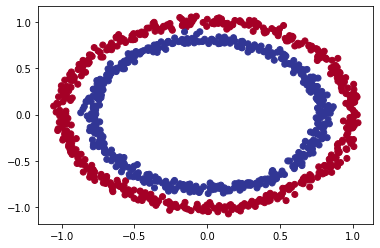

In [ ]:
# Visualize with a plot 
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes


In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([-0.97062946,  0.03782132]), 0)

## Steps in modelling

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tune model
6. Evaluate model...

In [ ]:
import tensorflow as tf
tf.__version__

# Set random seed
tf.random.set_seed(42)

# 1. Create model using Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
# 3. Fit model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 5.1809 - accuracy: 0.5840
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 5.1278 - accuracy: 0.5580
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.9459 - accuracy: 0.5380
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 4.9308 - accuracy: 0.5430
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 4.8591 - accuracy: 0.5370


In [ ]:
# Let's try to improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931741833686829, 0.5]

Since we're working on a binary classification problem, an accuracy of 50% is basically like a random guess. We Will try to add an extra layer.

In [ ]:
# Set random seed
tf.random.set_seed(18)

# Create model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit model
model_2.fit(X,y,epochs=200,verbose=0)

# Evaluate model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving model
1. Creating model - add more layers or increase number of hidden units within layer
2. Compiling model - choose different optimization function eg. Adam vs. SGD
3. Fitting a model - fit our model to more epochs, change callbacks

In [ ]:
# Set random seed
tf.random.set_seed(18)

# Create model (this time with 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit model
model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Evaluate model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4860


[0.6941264867782593, 0.4860000014305115]

To visualize our model's predictions, we will create a function `plot_decision_boundary()` to:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of different X values
* Make predictions across the meshgrid
* Plot predictions as well as a line between zones


In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define axis boundaries of plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() +0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() +0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification\n")
    # We must reshape our prediction
    y_pred=np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification\n")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Doing binary classification



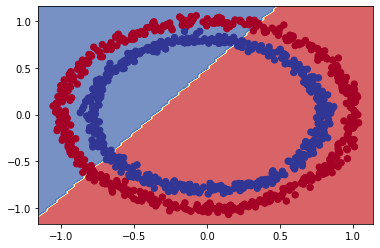

In [ ]:
# Check predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
# Let's see if our model can be used for a regression problem...

# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

X_regression, y_regression

# Split regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit model to regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

Model has to be compiled for regression instead of binary classification

In [ ]:
# Set random seed
tf.random.set_seed(18)

# Create model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                           
])

# Compile model, this time with regression-specific loss function
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
# Fit model
model_4.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 604.5295 - mae: 604.5295
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 498.6613 - mae: 498.6613
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 395.2053 - mae: 395.2053
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 291.3028 - mae: 291.3028
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 184.3638 - mae: 184.3638
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 78.8259 - mae: 78.8259
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 62.5050 - mae: 62.5050
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 82.7695 - mae: 82.7695
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 65.9174 - mae: 65.9174
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 43.4713 - mae: 43.4713
Epoch 11/100
5/5 [==============================]

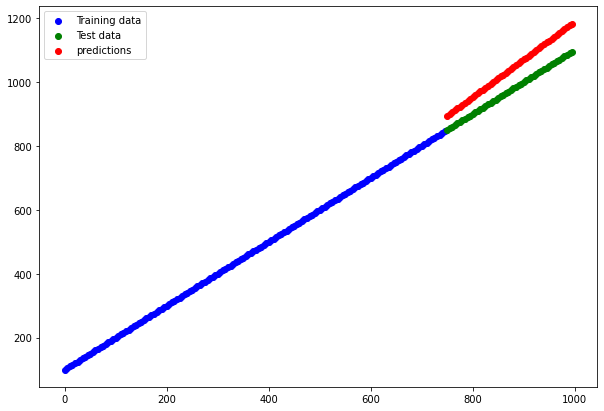

In [ ]:
# Make predictions with trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot model predictions against regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='predictions')
plt.legend();

## Non-linearity

In [ ]:
# Set random seed
tf.random.set_seed(18)

# Create model
model_5 = tf.keras.Sequential([
 tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy']
)

# Fit model
history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 6.0198 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 6.0055 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 6.0022 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9888 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9865 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9753 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9712 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9628 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9082 - accuracy: 0.4860
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8681 - accuracy: 0.4850
Epoch 11/

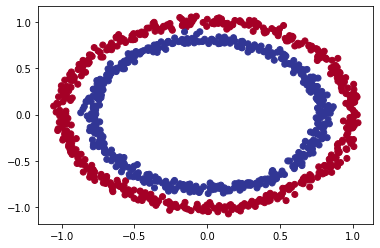

In [ ]:
# Check out data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

Doing binary classification



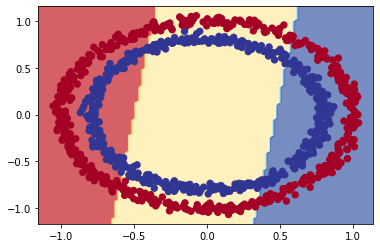

In [ ]:
# Check desision boundary for latest function
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

Let's try to build our first neural network with a non-linear activation function

In [ ]:
# Set random seed
tf.random.set_seed(18)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)                             
])

# Compile model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Fit model

history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 6.0198 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 6.0055 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 6.0022 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9888 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9865 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9753 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9712 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9628 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9082 - accuracy: 0.4860
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8681 - accuracy: 0.4850
Epoch 11/

In [ ]:
# We will try adding extra layers and neurons

# Set random seed
tf.random.set_seed(18)

# Create model
model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu')
                               ])

# Compile model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Fit model
history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 4.3098 - accuracy: 0.1720
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 4.1124 - accuracy: 0.1590
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 3.9236 - accuracy: 0.1560
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 3.8011 - accuracy: 0.1520
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 3.6837 - accuracy: 0.1440
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 3.5856 - accuracy: 0.1430
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 3.2774 - accuracy: 0.1350
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 3.1990 - accuracy: 0.1390
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 3.1851 - accuracy: 0.1390
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 3.1416 - accuracy: 0.1310
Epoch 11/

Doing multiclass classification



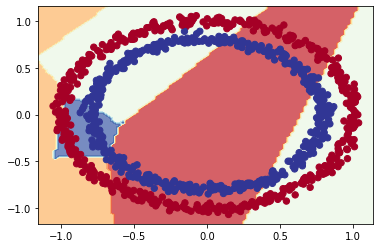

In [ ]:
# Visualizing predictions
plot_decision_boundary(model_7, X, y)

In [ ]:
X

array([[-0.97062946,  0.03782132],
       [-0.81032756, -0.04961955],
       [ 0.55650471,  0.79362129],
       ...,
       [ 0.06833668,  1.03462829],
       [-0.95074224, -0.27235243],
       [-0.83796162, -0.5500797 ]])

In [ ]:
y

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,

In [ ]:
# Set random seed
tf.random.set_seed(18)

# Create model
model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Fit model
history = model_8.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5020
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.5090
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5060
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.5090
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5070
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.5070
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5130
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5160
Epoch 11/

In [ ]:
# Evaluate model
model_8.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.3022 - accuracy: 0.9720


[0.3022237718105316, 0.972000002861023]

Doing binary classification



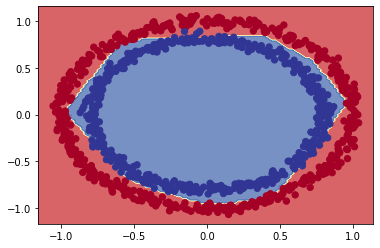

In [ ]:
# Evaluate model
plot_decision_boundary(model_8, X, y)

The combination of **linear** and **non-linear** functions is one of the key fundamentals of neural networks.

In [ ]:
# Create demo tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

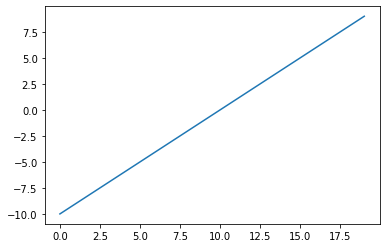

In [ ]:
# Visualize demo tensor
plt.plot(A)

In [ ]:
# We will replicate the sigmoid function - sigmoid(x) = 1 / (1+exp(-x))
def sigmoid(x):
  return 1 / (1+tf.exp(-x))

# Use sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

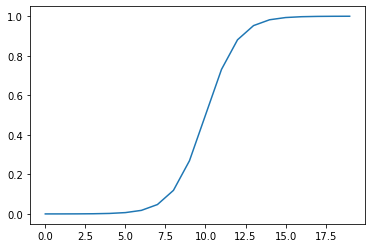

In [ ]:
# Plot our tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [ ]:
# We will replicate relu function
def relu(x):
  return tf.maximum(0, x)

# Use relu on our tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

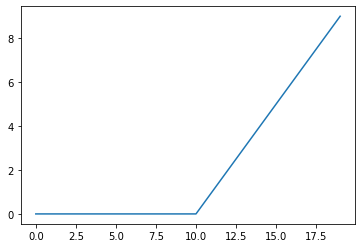

In [ ]:
plt.plot(relu(A))

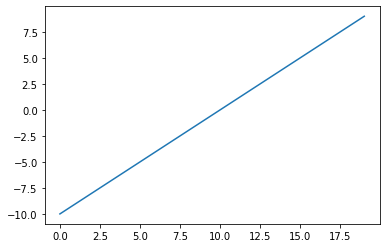

In [ ]:
plt.plot(tf.keras.activations.linear(A))

## Evaluating and Improving our classification

In [ ]:
# Check number of samples
len(X)

1000

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape

((800, 2), (200, 2))

In [ ]:
# Recreate model to fit on training data and evaluate on testing data

# Set random seed
tf.random.set_seed(42)

# Create model
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')

])

# Compile model
model_9.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# Fit model
history = model_9.fit(X,y,epochs=25)

Epoch 1/25
32/32 [==============================] - 1s 1ms/step - loss: 0.6920 - accuracy: 0.5080
Epoch 2/25
32/32 [==============================] - 0s 1ms/step - loss: 0.6738 - accuracy: 0.5690
Epoch 3/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.6690
Epoch 4/25
32/32 [==============================] - 0s 1ms/step - loss: 0.5999 - accuracy: 0.7440
Epoch 5/25
32/32 [==============================] - 0s 1ms/step - loss: 0.4885 - accuracy: 0.9110
Epoch 6/25
32/32 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.9680
Epoch 7/25
32/32 [==============================] - 0s 1ms/step - loss: 0.2151 - accuracy: 0.9860
Epoch 8/25
32/32 [==============================] - 0s 1ms/step - loss: 0.1255 - accuracy: 0.9940
Epoch 9/25
32/32 [==============================] - 0s 1ms/step - loss: 0.0839 - accuracy: 0.9990
Epoch 10/25
32/32 [==============================] - 0s 1ms/step - loss: 0.0598 - accuracy: 1.0000
Epoch 11/25
32/32 [

In [ ]:
# Evaluate on test dataset
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000


[0.0053567648865282536, 1.0]

Doing binary classification

Doing binary classification



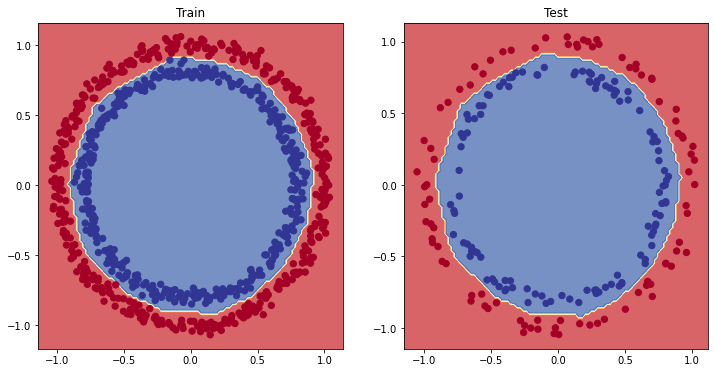

In [ ]:
# Visualize predictions
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_9, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_9, X=X_test, y=y_test)
plt.show()

## Plotting loss curves

In [ ]:
history.history['accuracy'][:5]

[0.5080000162124634,
 0.5690000057220459,
 0.6690000295639038,
 0.7440000176429749,
 0.9110000133514404]

In [ ]:
# Convert history object into DataFrame
pd.DataFrame(history.history).head()

,loss,accuracy
0,0.691963,0.508
1,0.673803,0.569
2,0.651403,0.669
3,0.599928,0.744
4,0.488470,0.911


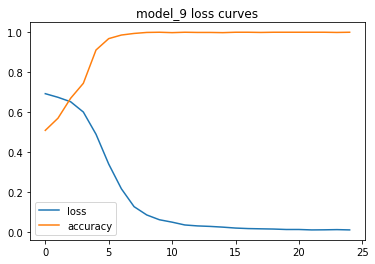

In [ ]:
# Plot loss curves
pd.DataFrame(history.history).plot()
plt.title('model_9 loss curves');

**Note**: For many problems, the loss function decreasing means the model is improving (the prediction's it's making are getting closer to the ground truth labels.)

## Finding the best learning rate

To find the ideal learning rate, we will use the following steps:

* A learning rate **callback** - an extra piece of functionality you can execute while training
* Another model 
* A modified loss curve plot


In [ ]:
# Set random seed
tf.random.set_seed(18)

# Create a model
model_10 = tf.keras.Sequential([
                                tf.keras.layers.Dense(16, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model_10.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit model 
history_10 = model_10.fit(X_train,
                          y_train,
                          epochs=100,
                          callbacks=[lr_scheduler]
                          )

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6972 - accuracy: 0.4925
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6970 - accuracy: 0.4963
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6964 - accuracy: 0.5025
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6961 - accuracy: 0.4975
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4975
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6954 - accuracy: 0.4925
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.4900
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4750
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4863
Epoch 11/

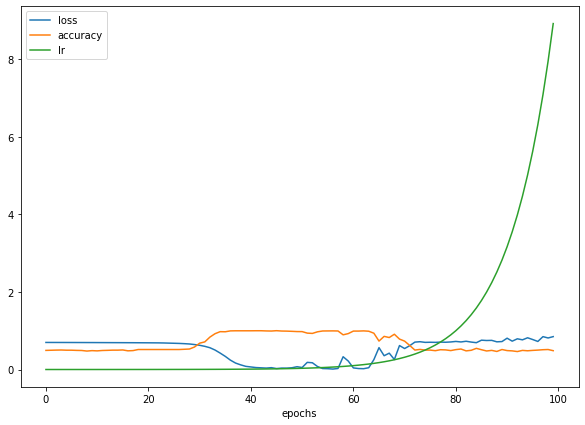

In [ ]:
# View history
pd.DataFrame(history_10.history).plot(figsize=(10,7), xlabel='epochs');

In [ ]:
# Plot learning rate vs. loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning Rate vs. Loss')

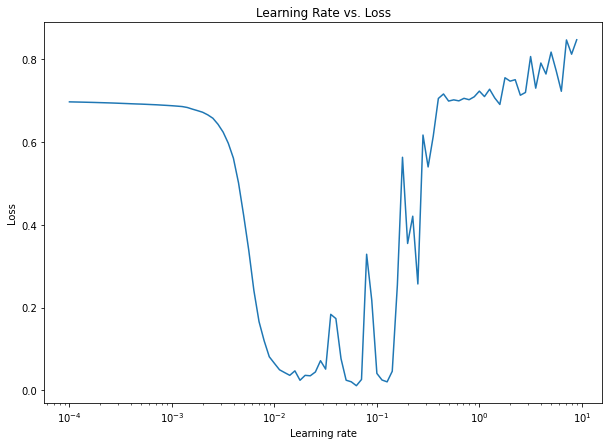

In [ ]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_10.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs. Loss')

In [ ]:
# We will try using a higher *ideal* learning rate with the same model

tf.random.set_seed(18)

# Create model
model_11 = tf.keras.Sequential([
                                tf.keras.layers.Dense(16, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model with ideal learning rate
model_11.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=['accuracy'])

# Fit model for 20 epochs (5 less than before)
history_11 = model_11.fit(X_train, y_train, epochs=20)


Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5200
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.5375
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6552 - accuracy: 0.6037
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6089 - accuracy: 0.7000
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5023 - accuracy: 0.8675
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3865 - accuracy: 0.9425
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2762 - accuracy: 0.9712
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.1975 - accuracy: 0.9850
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.1507 - accuracy: 0.9950
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1249 - accuracy: 0.9950
Epoch 11/20
25/25 [

In [ ]:
 # Evaluate model 11 on test dataset
 model_11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 1.0000


[0.02421063371002674, 1.0]

Doing binary classification

Doing binary classification



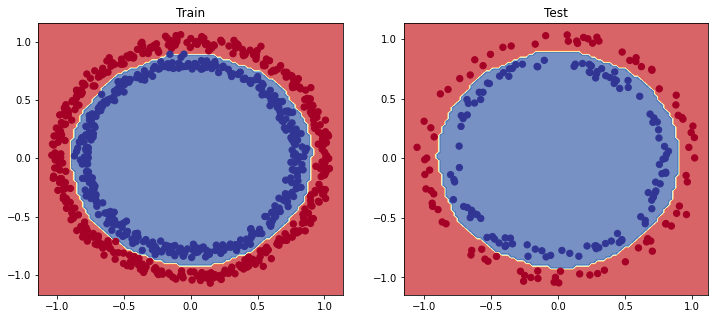

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_11, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_11, X_test, y_test)

## More Classification Evaluation Methods

Alongside visualizing our results as much as possible, there are other classificaton methods and metrics we should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from Scikit-Learn)

In [ ]:
# Check accuracy of our model
loss, accuracy = model_11.evaluate(X_test, y_test)
print(f'Model loss on test set: {loss}')
print(f'Model accuracy on test set: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 1.0000
Model loss on test set: 0.02421063371002674
Model accuracy on test set: 100.00%


In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_11.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

ValueError: ignored

In [ ]:
y_preds[:5]

array([[0.97369397],
       [0.00132352],
       [0.97369397],
       [0.00156206],
       [0.97369397]], dtype=float32)

In [ ]:
y_test[:5]

array([1, 0, 1, 0, 1])

Oour predictions array has come out in prediction probability form.. the standard output of the sigmoid (or softmax) activation functions

In [ ]:
# Convert prediction probabilities to binary format
tf.round(y_preds)[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)>

In [ ]:
# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[ 88,   0],
       [  0, 112]])

In [151]:


def plot_confusion_matrix(y_true=y_test,
                          y_preds=y_preds,
                          figsize=(10,10),
                          classes=None,
                          text_size=20):
  """
  Plots confusion matrix given test labels and predictions.
  """
  import itertools
  from sklearn.metrics import confusion_matrix

  # Create confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_preds))
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize confusion matrix
  n_classes = cm.shape[0]

  # Add aesthetics
  fig, ax = plt.subplots(figsize=figsize)
  # Create matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label axes
  ax.set(title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='True Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)


  # Set x-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size + 5)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.0

  # Plot text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i,j]} ({cm_norm[i, j]*100:.1f}%)',
    horizontalalignment='center',
    color='white' if cm[i,j] > threshold else 'black',
    size = 15)



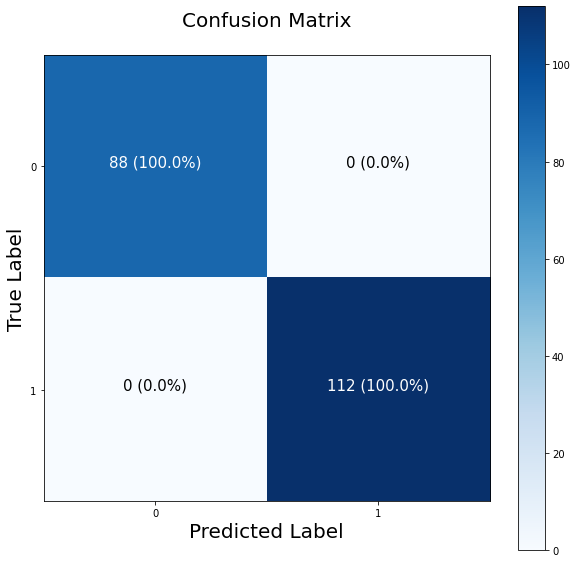

In [ ]:
plot_confusion_matrix()

## Working with a larger dataset (multiclass classification)

When you have more than two classes as an option, this is known as **multi-class classification**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted in training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show training example
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

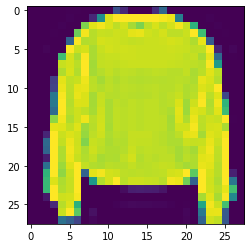

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [ ]:
# Check out samples label
train_labels[7]

2

In [ ]:
 # Create a small list so we can index onto our training labels
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

len(class_names)

10

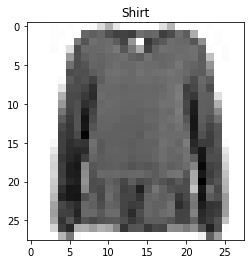

In [ ]:
# Plot an example image and its label
def plot_image(index=0):
  plt.imshow(train_data[index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[index]])

plot_image(18)

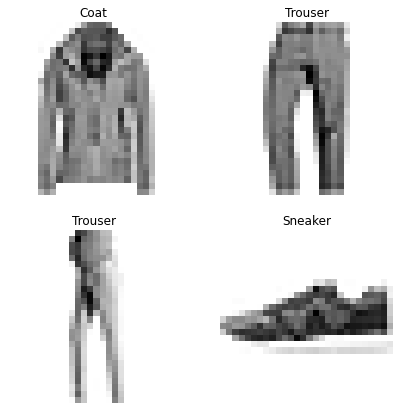

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we will change a few things:

* Input shape = 28 x 28 (shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If labels are one-hot encoded, use CategoricalCrossentropy()
  * If labels are in integer form, use SparseCategoricalCrossentropy()
* Output layer activation = softmax(not sigmoid)


In [ ]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
28*28

784

In [ ]:
tf.one_hot(train_labels, depth=10)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [110]:
# Set random seed
tf.random.set_seed(18)

# Create model
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

# Fit model
history = model.fit(train_data,
                    tf.one_hot(train_labels, depth=10),
                    epochs=10,
                    validation_data=(test_data, tf.one_hot(test_labels, depth=10))
                    )

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1903 - accuracy: 0.3907 - val_loss: 1.2815 - val_accuracy: 0.4725
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1516 - accuracy: 0.5175 - val_loss: 1.1725 - val_accuracy: 0.5293
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0107 - accuracy: 0.5828 - val_loss: 0.9744 - val_accuracy: 0.6327
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8807 - accuracy: 0.6349 - val_loss: 0.8179 - val_accuracy: 0.6739
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7415 - accuracy: 0.7050 - val_loss: 0.7467 - val_accuracy: 0.7154
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6534 - accuracy: 0.7359 - val_loss: 0.6695 - val_accuracy: 0.7320
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6237 - accuracy: 0.7425 - val_loss: 0.6533 - val_accuracy:

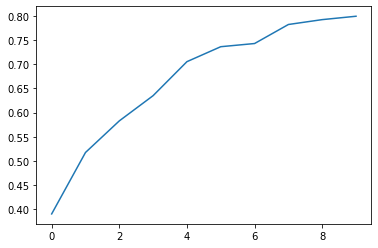

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
# Check model summary
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_53 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_54 (Dense)             (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check min and max values of training data

In [ ]:
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means that they work best with numbers between 0 and 1.

In [ ]:
# Normalizing by dividing by maximum value
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check min and max values of scaled data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [113]:
# Set random seed
tf.random.set_seed(18)

# Create model
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

# Fit model
history_norm = model.fit(train_data_norm,
                    train_labels,
                    epochs=10,
                    validation_data=(test_data_norm, test_labels)
                    )

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5712 - accuracy: 0.8002 - val_loss: 0.4682 - val_accuracy: 0.8312
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4188 - accuracy: 0.8515 - val_loss: 0.4375 - val_accuracy: 0.8462
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3820 - accuracy: 0.8635 - val_loss: 0.4386 - val_accuracy: 0.8367
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3600 - accuracy: 0.8711 - val_loss: 0.3892 - val_accuracy: 0.8618
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3441 - accuracy: 0.8746 - val_loss: 0.3972 - val_accuracy: 0.8567
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3315 - accuracy: 0.8783 - val_loss: 0.3940 - val_accuracy: 0.8593
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3195 - accuracy: 0.8850 - val_loss: 0.3831 - val_accuracy:

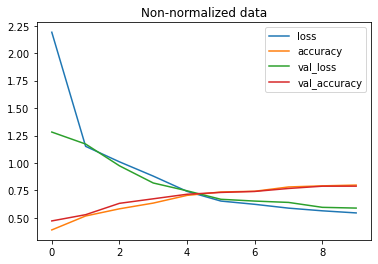

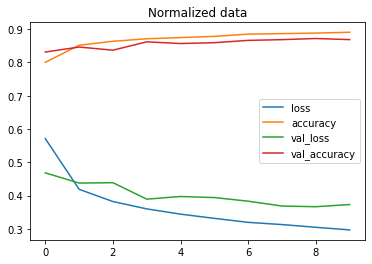

In [114]:
import pandas as pd
# Plot non-normalized data data loss curves
pd.DataFrame(history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(history_norm.history).plot(title='Normalized data')

## Finding ideal learning rate

In [117]:
# Set random seed
tf.random.set_seed(18)

# Create model
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy']
              )

# Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 *10**(epoch/20))

# Fit model
find_lr_history = model.fit(train_data_norm,
                            train_labels,
                            epochs=40,
                            validation_data=(test_data_norm, test_labels),
                            callbacks=[lr_scheduler]
                            )

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5712 - accuracy: 0.8002 - val_loss: 0.4682 - val_accuracy: 0.8312
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4217 - accuracy: 0.8508 - val_loss: 0.4420 - val_accuracy: 0.8455
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3858 - accuracy: 0.8614 - val_loss: 0.4405 - val_accuracy: 0.8368
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3657 - accuracy: 0.8684 - val_loss: 0.3995 - val_accuracy: 0.8570
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3520 - accuracy: 0.8719 - val_loss: 0.3995 - val_accuracy: 0.8552
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3424 - accuracy: 0.8752 - val_loss: 0.3965 - val_accuracy: 0.8589
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3317 - accuracy: 0.8804 - val_loss: 0.3793 - val_accuracy:

Text(0.5, 1.0, 'Finding ideal learning rate')

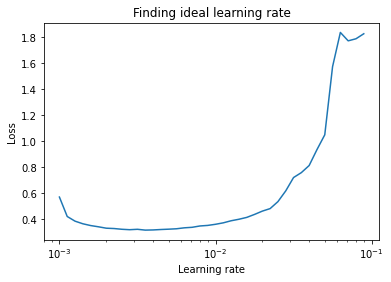

In [118]:
# Plot learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding ideal learning rate')


In [119]:
# Refitting model with ideal learning rate

# Set random seed
tf.random.set_seed(18)

# Create model
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')

])

# Compile model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Fit model
model.fit(train_data_norm,
          train_labels,
          epochs=25,
          validation_data=(test_data_norm, test_labels)
          )

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5712 - accuracy: 0.8002 - val_loss: 0.4682 - val_accuracy: 0.8312
Epoch 2/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4188 - accuracy: 0.8515 - val_loss: 0.4375 - val_accuracy: 0.8462
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3820 - accuracy: 0.8635 - val_loss: 0.4386 - val_accuracy: 0.8367
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3600 - accuracy: 0.8711 - val_loss: 0.3892 - val_accuracy: 0.8618
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3441 - accuracy: 0.8746 - val_loss: 0.3972 - val_accuracy: 0.8567
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3315 - accuracy: 0.8783 - val_loss: 0.3940 - val_accuracy: 0.8593
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3195 - accuracy: 0.8850 - val_loss: 0.3831 - val_accuracy:

## Evaluating multi-class classification model

To evaluate our model, we could:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Assess its predictions (through visualizations)
* Improve its results (by training for longer or changing architecture)
* Save and export model for use in application

## Create a confusion matrix for multi-class classification

In [122]:
# Make predictions with model
y_probs = model.predict(test_data_norm)

# View first 5 predictions
y_probs[:5]

array([[6.9093083e-08, 4.5316931e-08, 3.0107586e-07, 5.1748899e-05,
        1.1198395e-10, 9.6437027e-05, 2.5396311e-08, 2.1295082e-02,
        8.6296377e-06, 9.7854769e-01],
       [5.5394954e-05, 4.8095902e-16, 9.9716824e-01, 8.8104542e-17,
        2.0983489e-03, 6.8360095e-10, 6.7798834e-04, 2.7278209e-25,
        1.0650963e-11, 8.9491032e-23],
       [2.2629112e-07, 9.9999964e-01, 3.3529169e-08, 9.0225022e-08,
        2.8091756e-09, 2.6497866e-23, 2.0638713e-09, 2.7633122e-29,
        1.0237530e-15, 9.8870359e-24],
       [2.2311417e-06, 9.9995947e-01, 8.3219550e-07, 3.7239712e-05,
        1.7138885e-07, 3.2531632e-15, 5.6418735e-08, 3.0458133e-21,
        2.5627508e-12, 7.5155625e-17],
       [3.6750728e-01, 9.2241850e-09, 7.5397775e-02, 1.3832586e-03,
        2.1169183e-03, 3.6404402e-10, 5.5359453e-01, 4.9783160e-16,
        1.9166868e-07, 1.3868927e-11]], dtype=float32)

In [123]:
y_probs[0]

array([6.9093083e-08, 4.5316931e-08, 3.0107586e-07, 5.1748899e-05,
       1.1198395e-10, 9.6437027e-05, 2.5396311e-08, 2.1295082e-02,
       8.6296377e-06, 9.7854769e-01], dtype=float32)

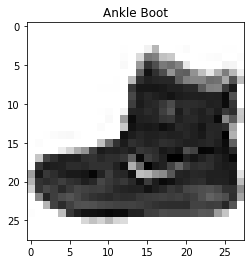

In [124]:
plot_image(0)

In [141]:
# Convert all prediction probabilities into integer
y_preds = y_probs.argmax(axis=1)

# View first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [142]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [143]:
model.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3974 - accuracy: 0.8698


[0.397390753030777, 0.8697999715805054]

In [144]:
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[838,   1,  13,  36,   0,   1, 106,   0,   5,   0],
       [  2, 966,   2,  24,   2,   0,   4,   0,   0,   0],
       [ 17,   3, 825,  17,  60,   0,  77,   0,   1,   0],
       [ 22,   8,   8, 918,  13,   0,  26,   0,   4,   1],
       [  1,   4, 167,  55, 658,   0, 114,   0,   1,   0],
       [  0,   0,   0,   0,   0, 940,   0,  33,   3,  24],
       [119,   1, 107,  41,  37,   0, 685,   0,  10,   0],
       [  0,   0,   0,   0,   0,  11,   0, 970,   1,  18],
       [  6,   2,  10,  10,   1,   3,  16,   5, 947,   0],
       [  0,   0,   0,   0,   0,   3,   1,  44,   1, 951]])

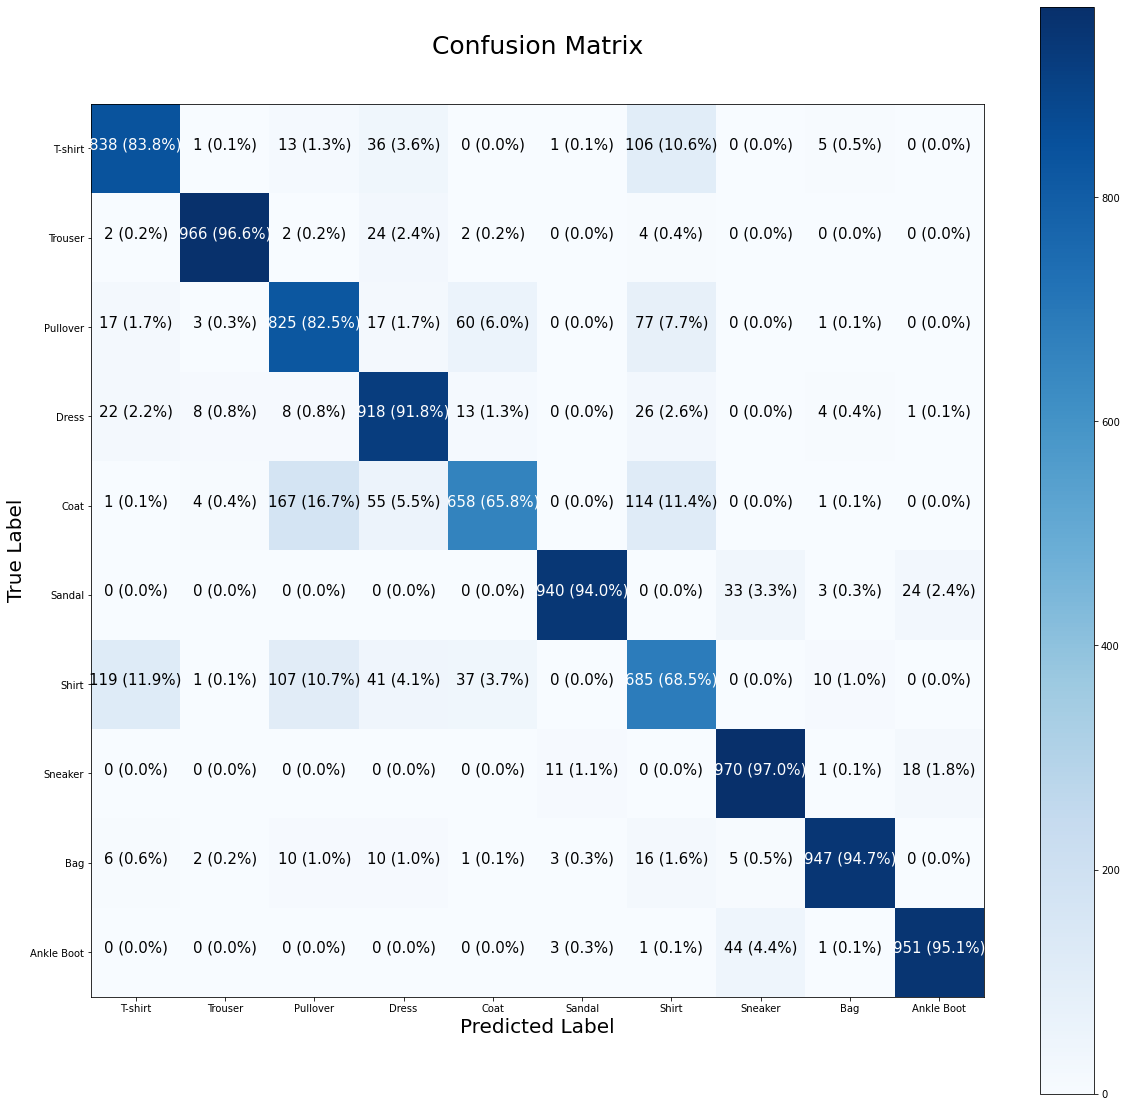

In [153]:
# Make aesthetic confusion matrix

plot_confusion_matrix(y_true=test_labels,
                      y_preds=y_preds,
                      classes=class_names,
                      figsize=(20,20))

In [148]:
len(y_preds), len(test_labels)

(10000, 10000)

We will create a function to:
* Plot a random image
* Make a prediction on the image
* Label the plot with truth label and predicted label


In [156]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks random image, plots it and labels it with prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change color of titles depending on whether prediction is correct
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Add xlabel information
  plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # Set color to red or green based on correctness

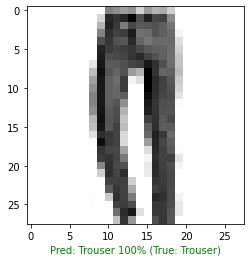

In [180]:
# Check out random image and prediction
plot_random_image(model=model,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns are our model learning?

In [181]:
# Find layers in our most recent model
model.layers

In [183]:
# Extract a particular layer
model.layers[1]

In [185]:
# Get the patterns of a layer in network
weights, biases = model.layers[1].get_weights()

# Weights and weights shapes
weights, weights.shape

(array([[ 0.05438949, -0.17373046, -0.656371  , ...,  0.73987424,
         -0.06913966,  0.37853587],
        [ 0.11040126, -0.4291328 , -0.638162  , ...,  0.46305194,
         -0.49869984, -0.76508707],
        [-0.38027602, -1.5572944 , -0.8576332 , ...,  0.19172014,
         -0.4861561 ,  0.15625091],
        ...,
        [ 0.3722489 ,  0.6011042 ,  0.7511649 , ..., -0.16270688,
          0.3144934 , -0.10994429],
        [ 0.62215996, -0.4430859 ,  0.52689636, ...,  1.0081812 ,
          0.38097316,  0.61648715],
        [ 0.12576929,  0.631476  , -0.43559012, ...,  1.042864  ,
         -0.09000758,  0.90982836]], dtype=float32), (784, 32))

Now we will check out the bias vector

In [186]:
# Biases and bias shapes
biases, biases.shape


(array([ 0.03234573,  0.26960108,  0.6855686 ,  0.5794961 ,  0.99120027,
        -0.03456097,  0.51823795,  0.92821014,  0.14361162, -0.02777672,
         0.2601976 ,  0.44782123, -0.02191979,  0.7441177 ,  0.22083881,
         0.40438738, -0.02619476,  0.60397536,  0.37903705,  0.38918042,
         0.5087035 ,  0.9630687 ,  0.7981437 ,  0.3862493 ,  0.353851  ,
        -0.02354486,  0.36176032,  0.86744606, -0.56178343,  0.7860813 ,
         0.14644526, -0.17172483], dtype=float32), (32,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector gets initialized as zeros (in the case of the TensorFlow Dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.


In [187]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_72 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_73 (Dense)             (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


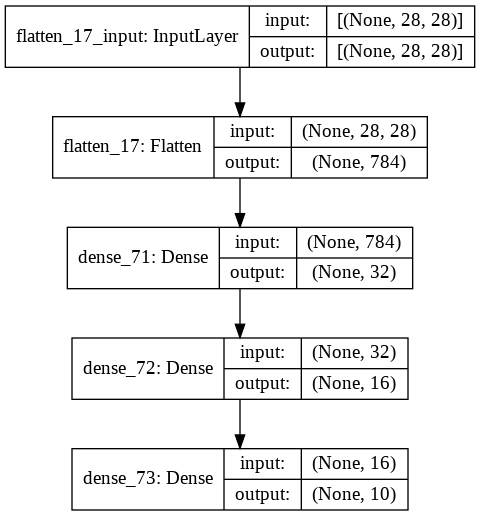

In [189]:
# Another way to view deep learning models
from tensorflow.keras.utils import plot_model
# See inputs and outputs of each layer
plot_model(model, show_shapes=True)